In [51]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
x_1 = np.linspace(start = -3, stop = 3, num = 10)

In [3]:
def f(x):
    return x**2 + x + 1

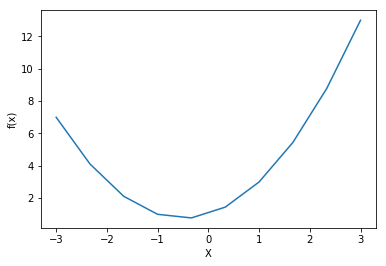

In [4]:
plt.plot(x_1, f(x_1))
plt.xlabel('X')
plt.ylabel('f(x)')
plt.style.use('fivethirtyeight')

## Slope & Derivative

In [5]:
def df(x):
    return 2*x + 1

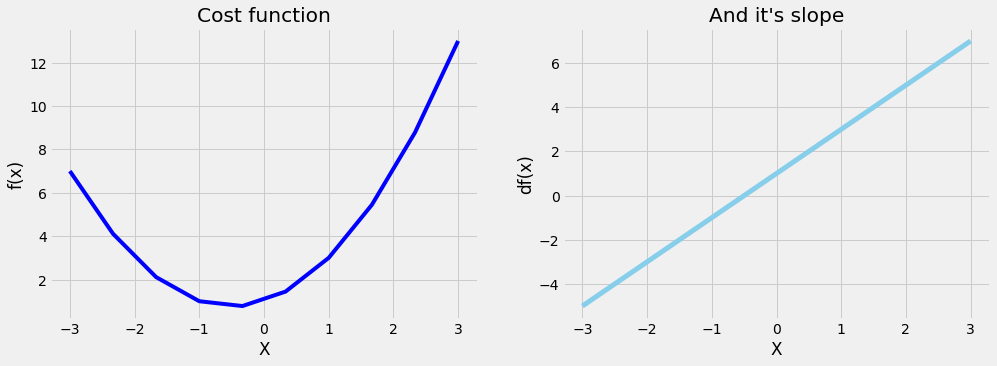

In [6]:
plt.figure(figsize=[15, 5])

#Cost function
plt.subplot(1, 2, 1)

plt.title('Cost function')
plt.xlabel('X')
plt.ylabel('f(x)')

plt.plot(x_1, f(x_1), color='blue')

plt.style.use('fivethirtyeight')

#Derivative
plt.subplot(1, 2, 2)

plt.title('And it\'s slope')
plt.xlabel('X')
plt.ylabel('df(x)')

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('baaaaaaa', n)

baaaaaaa 0
baaaaaaa 1
baaaaaaa 2
baaaaaaa 3
baaaaaaa 4


In [8]:
# Python while loop
counter = 0
while counter < 7:
    print('counting...',  counter)
    counter = counter + 1

counting... 0
counting... 1
counting... 2
counting... 3
counting... 4
counting... 5
counting... 6


In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Mutiple Minima vs Initial Guess & Advanced Functions
$$ g(x) = x^4 - 4x^2 +5 $$

In [10]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

In [11]:
def g(x):
    return x**4 - 4*x**2 + 5

In [12]:
def dg(x):
    return 4*x**3 - 8*x

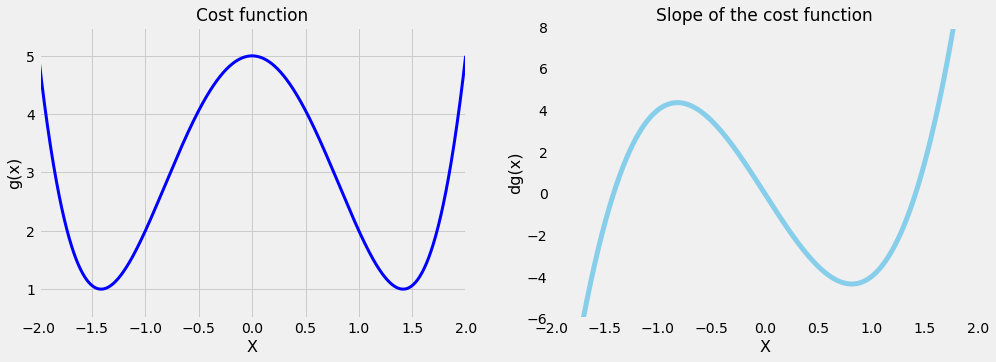

In [13]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

In [14]:
# Gradient Descent as function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        # print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [15]:
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.01)
print('Local min occur at: ', local_min)
print('Number of steps: ', len(x_list))

Local min occur at:  -1.412441857753588
Number of steps:  50


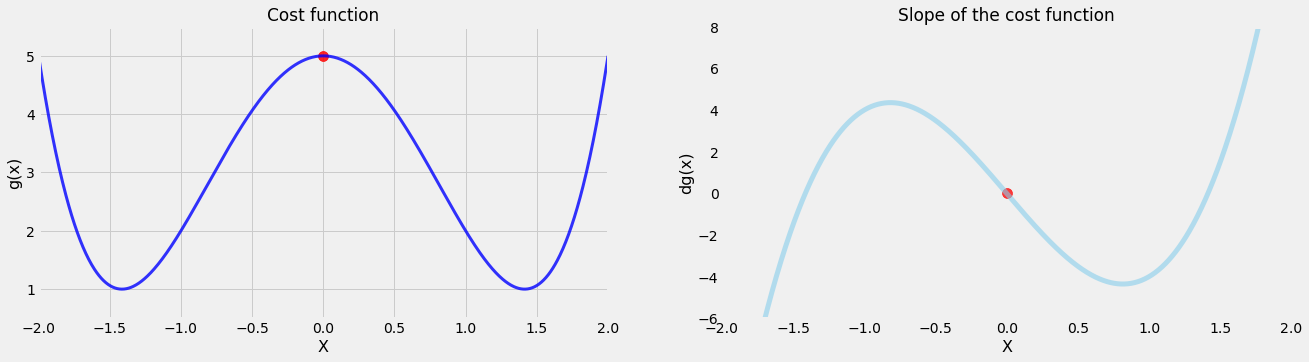

In [16]:
# Plot function and derivative side by side
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)


plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha = 0.8)
plt.scatter(x_list, g(np.array(x_list)), color = 'r', s = 100, alpha = 0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha = 0.6)
plt.scatter(x_list, dg(np.array(x_list)), color = 'r', s = 100, alpha = 0.5)
plt.show()

# Example 3: Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [17]:
# Make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

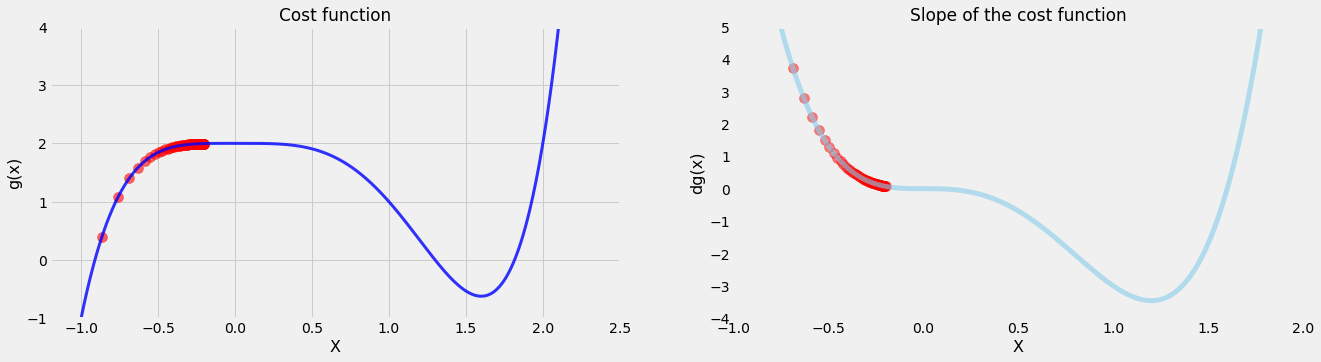

In [18]:
# Calling Gradient Descent
local_min, x_list, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter = 71)

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)


plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha = 0.8)
plt.scatter(x_list, h(np.array(x_list)), color = 'r', s = 100, alpha = 0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha = 0.6)
plt.scatter(x_list, dh(np.array(x_list)), color = 'r', s = 100, alpha = 0.5)
plt.show()

In [19]:
print('Local min occur at: ', local_min)
print('Cost at this point: ', h(local_min))
print('Number of steps: ', len(x_list))

Local min occur at:  -1.8398461123332792e+24
Cost at this point:  -2.1081790694225687e+121
Number of steps:  72


In [20]:
import sys
sys.float_info.max

1.7976931348623157e+308

In [21]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado', 1
unlucky_number = 13, 4, 9, 17, 26
type(breakfast)
tuple_with_one_value = 'this', 
type(tuple_with_one_value)
one, two, three, four = breakfast

In [22]:
three

'avocado'

In [23]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter = 71)

In [24]:
type(data_tuple)

tuple

In [25]:
data_tuple[0]

-1.8398461123332792e+24

# Learning Rate

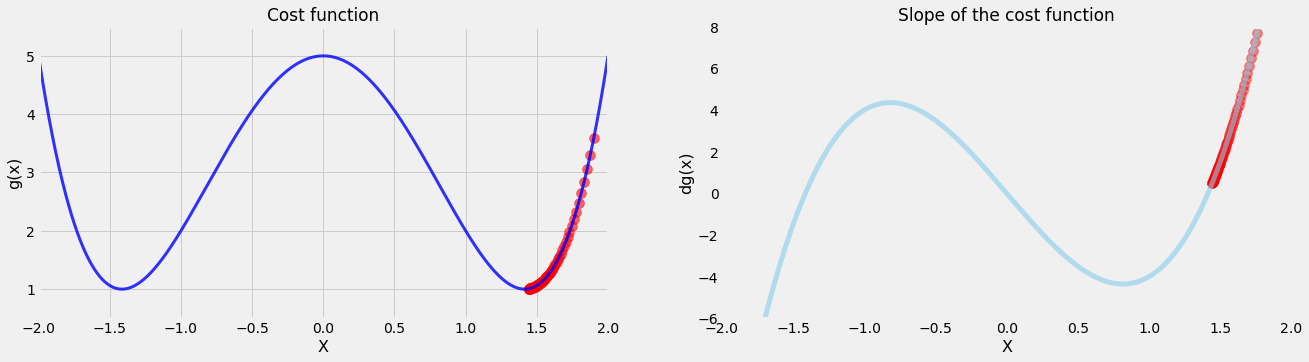

Number of step is:  75


In [26]:
# Plot function and derivative side by side
local_min, x_list, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier = 0.002)
plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)


plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha = 0.8)
plt.scatter(x_list, g(np.array(x_list)), color = 'r', s = 100, alpha = 0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha = 0.6)
plt.scatter(x_list, dg(np.array(x_list)), color = 'r', s = 100, alpha = 0.5)
plt.show()

print("Number of step is: ", len(x_list))

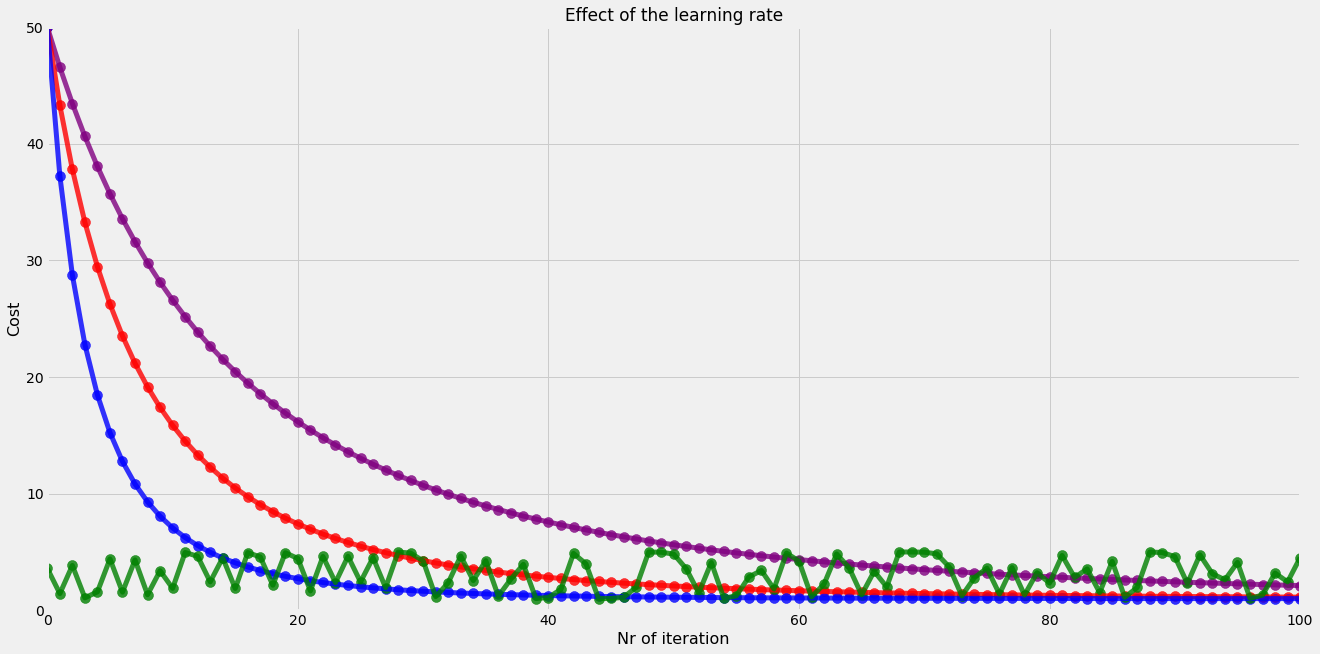

In [27]:
# Plot function and derivative side by side
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier = 0.0005, precision = 0.0001, max_iter=n)

mid_gamma =  gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier = 0.001, precision = 0.0001, max_iter=n)

high_gamma =  gradient_descent(derivative_func=dg, initial_guess=3,
                            multiplier = 0.002, precision = 0.0001, max_iter=n)

insane_gamma =  gradient_descent(derivative_func=dg, initial_guess=1.9,
                            multiplier = 0.25, precision = 0.0001, max_iter=n)
# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

# 1 Chart: Cost function

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Y Axis Data: convert the list into numpy arrays
low_values = np.array(low_gamma[1])

# X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(low_values), color='purple', linewidth=5, alpha = 0.8)
plt.scatter(iteration_list, g(low_values), color='purple', s = 100, alpha = 0.8)

# Y Axis Data: convert the list into numpy arrays
mid_values = np.array(mid_gamma[1])

# X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(mid_values), color='red', linewidth=5, alpha = 0.8)
plt.scatter(iteration_list, g(mid_values), color='red', s = 100, alpha = 0.8)

# Y Axis Data: convert the list into numpy arrays
high_values = np.array(high_gamma[1])

# X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(high_values), color='blue', linewidth=5, alpha = 0.8)
plt.scatter(iteration_list, g(high_values), color='blue', s = 100, alpha = 0.8)


# Y Axis Data: convert the list into numpy arrays
insane_values = np.array(insane_gamma[1])

# X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(insane_values), color='green', linewidth=5, alpha = 0.8)
plt.scatter(iteration_list, g(insane_values), color='green', s = 100, alpha = 0.8)

plt.show()

# Example 4: Data viz with 3D Charts
## $$f(x, y)=\frac{1}{3^{-x^2-y^2}+1} $$

Minimise $$f(x, y)=\frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}+1$



In [45]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [29]:
#make data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)



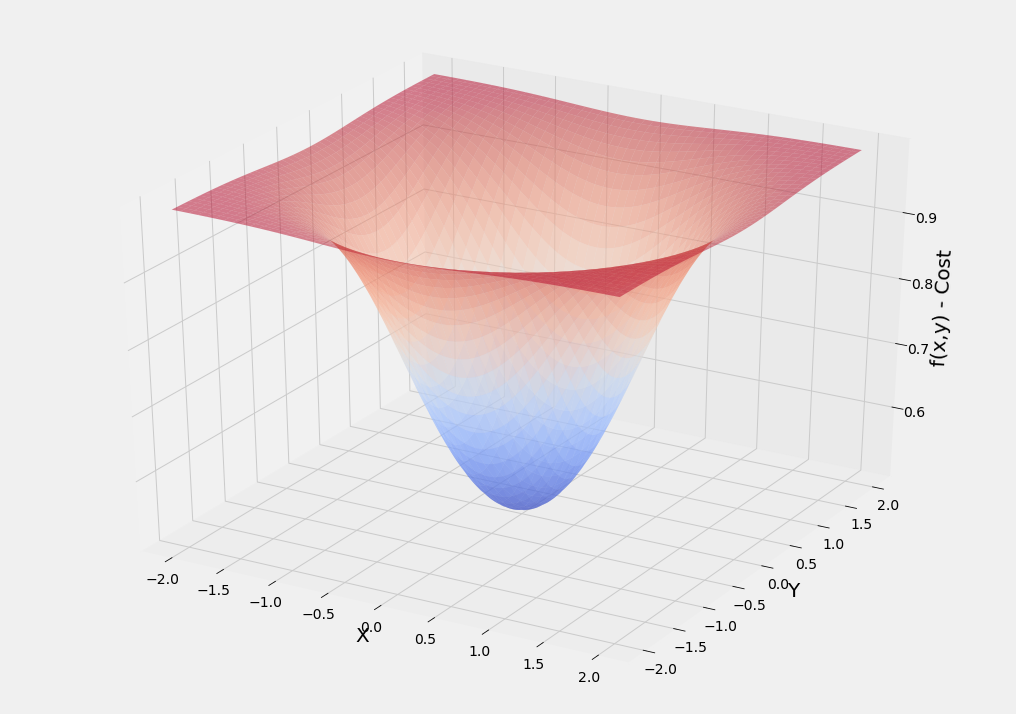

In [30]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)
plt.show()

# Partial Derivatives & Symbolic Computation

In [31]:
a, b = symbols('x, y')
print("Cost function: ",f(a, b))
print("Partial Derivertive with respect to a: ")
diff(f(a, b), a)

Cost function:  1/(3**(-x**2 - y**2) + 1)
Partial Derivertive with respect to a: 


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [32]:
f(a, b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

In [33]:
diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})

0.0368089716197505

# Batch Gradient Descent with Sympy
## $$\frac{\partial{f}}{\partial{x}}=\frac{2x\ln(3)\cdot3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [34]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
print('Values in gradient: ', gradients)
print('with x: ', params[0])
print('with y: ', params[1])
print('Cost function is: ', f(params[0], params[1]))

Values in gradient:  [2.01013037525579e-11 1.11673909736433e-11]
with x:  3.45838599885832e-11
with y:  1.92132555492129e-11
Cost function is:  0.500000000000000


In [35]:
#
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

In [36]:
#
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [37]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
print('Values in gradient: ', gradients)
print('with x: ', params[0])
print('with y: ', params[1])
print('Cost function is: ', f(params[0], params[1]))

Values in gradient:  [2.01013038e-11 1.11673910e-11]
with x:  3.458385998858304e-11
with y:  1.9213255549212797e-11
Cost function is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [49]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])
print(params)
values_array = params.reshape(1, 2)
print(values_array)
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1, 2), 0)
print('Values in gradient: ', gradients)
print('with x: ', params[0])
print('with y: ', params[1])
print('Cost function is: ', f(params[0], params[1]))

[1.8 1. ]
[[1.8 1. ]]
Values in gradient:  [2.01013038e-11 1.11673910e-11]
with x:  3.458385998858304e-11
with y:  1.9213255549212797e-11
Cost function is:  0.5


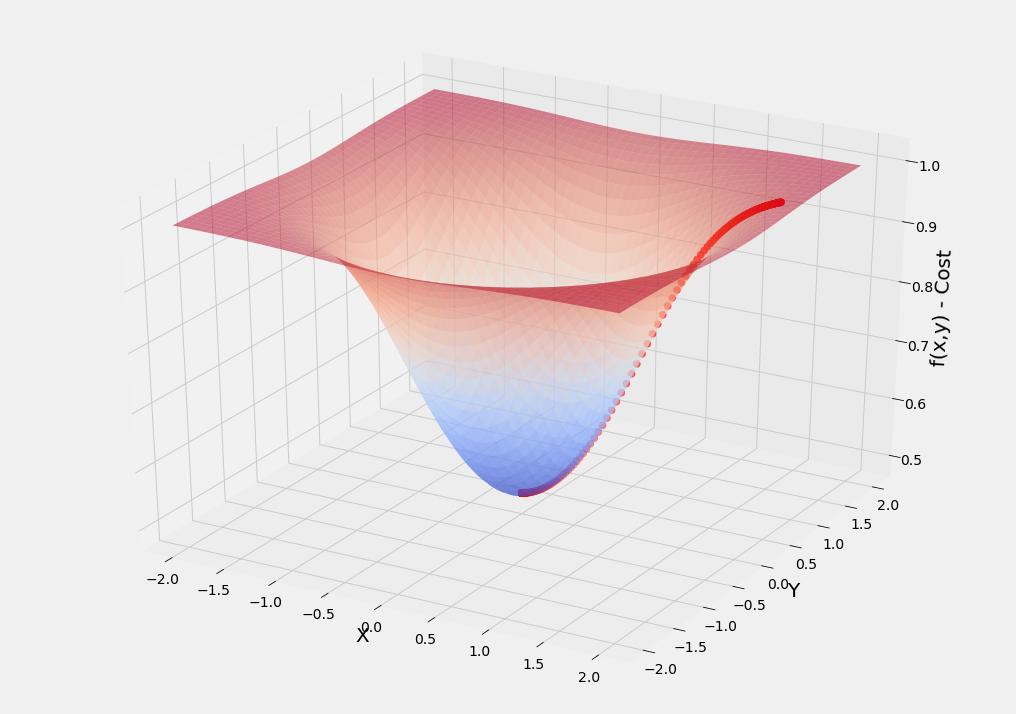

In [50]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')
plt.show()

# Example 5: Working with Data & a Real Cost Function
## Mean Square Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n}\big( y^{(i)} - h_\theta^{(i)} \big) $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n}\big( y^{(i)} - h_\theta^{(i)} \big) $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n}\big( y - \hat{y} \big) $$

In [61]:
# make data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print(x_5.shape)
print(y_5.shape)
print(x_5)

(7, 1)
(7, 1)
[[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]


In [62]:
# quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'y values')

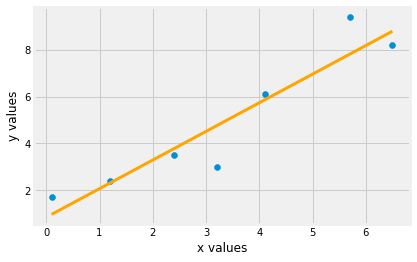

In [68]:
plt.scatter(x_5, y_5)
plt.plot(x_5, regr.predict(x_5),
         color='orange', linewidth = 3)
plt.xlabel('x values')
plt.ylabel('y values')